<a href="https://colab.research.google.com/github/vieirapcm/tcc_ai_fake-news/blob/main/01_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Estudo sobre pré-processamento de dados
# Objetivo: Ler os datasets e executar uma função para limpar os textos
#
# Etapas:
# [X] - Remover dos datasets as strings "É #FAKE" e "É #FATO"
# [X] - Captalização
# [ ] - Retirada de links
# [ ] - Retirada de caracteres especiais
# [ ] - Retirada de colchetes
# [ ] - Retirada de Stop-words
# [ ] - Tokenização

In [150]:
import numpy as np
import pandas as pd
import re,string
import nltk
import unicodedata
import matplotlib.pyplot as plt

%pip install unidecode
import unidecode

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [72]:
globo_ds = pd.read_csv('/content/globo_check_ds.csv')

In [49]:
globo_ds.head(10)

,title,description,url
0,É #FAKE que jogador de futebol Alex Apolinário...,Atleta morreu em janeiro de 2021 e ainda não h...,https://g1.globo.com/fato-ou-fake/coronavirus/...
1,É #FAKE que vídeo mostre pai desesperado na Pa...,"Vídeo é antigo, anterior à pandemia e à vacina...",https://g1.globo.com/fato-ou-fake/coronavirus/...
2,É #FAKE imagem de capa da Time em que soldado ...,Imagem não consta em acervo da revista. OMS af...,https://g1.globo.com/fato-ou-fake/coronavirus/...
3,É #FAKE que vídeo em que Boris Johnson dança c...,Política que contracena com Johnson afirma que...,https://g1.globo.com/fato-ou-fake/coronavirus/...
4,É #FAKE que Drauzio Varella escreveu texto ens...,Médico não escreveu coluna com esse teor. A im...,https://g1.globo.com/fato-ou-fake/coronavirus/...
5,"É #FAKE que resolução isente deputados, senado...",Mensagem falsa diz que a isenção é determinada...,https://g1.globo.com/fato-ou-fake/coronavirus/...
6,É #FAKE que Pfizer adicionou trometamina secre...,A trometamina está presente na composição da v...,https://g1.globo.com/fato-ou-fake/coronavirus/...
7,É #FAKE que vídeo mostre homem chorando sobre ...,"Na verdade, a imagem foi feita na Síria e most...",https://g1.globo.com/fato-ou-fake/coronavirus/...
8,É #FAKE que vacinas contra a Covid-19 são prod...,Terapia gênica envolve causar mudanças de prop...,https://g1.globo.com/fato-ou-fake/coronavirus/...
9,É #FAKE que fisioterapeuta do Incor que sofreu...,Fábio Rodrigues tomou a terceira dose em outub...,https://g1.globo.com/fato-ou-fake/coronavirus/...


In [160]:
df = pd.DataFrame(globo_ds)

In [161]:
df['title'] = df['url'] + ' ' + df['title']

In [162]:
df = df.drop('url', axis=1)


In [163]:
# Remover as strings padrão "É #FAKE" e "É #FATO"
df['title'] = df['title'].str.replace('É #FAKE', '').replace('É #FATO', '')

In [166]:
df.head(10)

,title,description
0,https://g1.globo.com/fato-ou-fake/coronavirus/...,Atleta morreu em janeiro de 2021 e ainda não h...
1,https://g1.globo.com/fato-ou-fake/coronavirus/...,"Vídeo é antigo, anterior à pandemia e à vacina..."
2,https://g1.globo.com/fato-ou-fake/coronavirus/...,Imagem não consta em acervo da revista. OMS af...
3,https://g1.globo.com/fato-ou-fake/coronavirus/...,Política que contracena com Johnson afirma que...
4,https://g1.globo.com/fato-ou-fake/coronavirus/...,Médico não escreveu coluna com esse teor. A im...
5,https://g1.globo.com/fato-ou-fake/coronavirus/...,Mensagem falsa diz que a isenção é determinada...
6,https://g1.globo.com/fato-ou-fake/coronavirus/...,A trometamina está presente na composição da v...
7,https://g1.globo.com/fato-ou-fake/coronavirus/...,"Na verdade, a imagem foi feita na Síria e most..."
8,https://g1.globo.com/fato-ou-fake/coronavirus/...,Terapia gênica envolve causar mudanças de prop...
9,https://g1.globo.com/fato-ou-fake/coronavirus/...,Fábio Rodrigues tomou a terceira dose em outub...


In [172]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()

In [173]:
df.head(10)

,title,description
0,jogador futebol alex apolinário morreu decorrê...,atleta morreu janeiro 2021 ainda havia tomado ...
1,vídeo mostre pai desesperado paraíba ver filho...,"vídeo antigo, anterior pandemia vacinação cont..."
2,imagem capa time soldado armado usa emblema oms,imagem consta acervo revista. oms afirma grupo...
3,vídeo boris johnson dança mulher sabre luz gra...,política contracena johnson afirma imagens fei...
4,drauzio varella escreveu texto ensinando socor...,médico escreveu coluna teor. imagem falsa serv...
5,"resolução isente deputados, senadores ministro...",mensagem falsa diz isenção determinada artigo ...
6,pfizer adicionou trometamina secretamente vaci...,trometamina presente composição vacina adultos...
7,vídeo mostre homem chorando sobre corpo crianç...,"verdade, imagem feita síria mostra criança vít..."
8,vacinas contra covid produtos terapia gênica,terapia gênica envolve causar mudanças propósi...
9,fisioterapeuta incor sofreu infarto tomou terc...,fábio rodrigues tomou terceira dose outubro de...


In [168]:
# nltk.download('stopwords')
stop = set(stopwords.words('portuguese'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [174]:
def string_to_lower(text):
    return text.str.lower()

# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '',text)

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
      if i.strip().lower() not in stop:
        final_text.append(i.strip())
    return " ".join(final_text)

def remove_special_characters(text):
    new_text = unicodedata.normalize("NFD", text)
    new_text = new_text.encode("ascii", "ignore")
    new_text = new_text.decode("utf-8")
    return new_text

def normalize_text(text, before, after):
    return text.replace(before, after)

def denoise_text(text):
    text = remove_url(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text = normalize_text(text, 'covid-19', 'covid')
    text = normalize_text(text, 'coronavirus', 'covid')
    text = normalize_text(text, 'coronavírus', 'covid')
    text = normalize_text(text, 'corona virus', 'covid')
    text = normalize_text(text, 'corona vírus', 'covid')

    return text

df['description'] = df['description'].apply(denoise_text)
df['title'] = df['title'].apply(denoise_text)
df

,title,description
0,jogador futebol alex apolinário morreu decorrê...,atleta morreu janeiro 2021 ainda havia tomado ...
1,vídeo mostre pai desesperado paraíba ver filho...,"vídeo antigo, anterior pandemia vacinação cont..."
2,imagem capa time soldado armado usa emblema oms,imagem consta acervo revista. oms afirma grupo...
3,vídeo boris johnson dança mulher sabre luz gra...,política contracena johnson afirma imagens fei...
4,drauzio varella escreveu texto ensinando socor...,médico escreveu coluna teor. imagem falsa serv...
...,...,...
583,mensagem manda prender respiração 10 segundos ...,texto circula frequência redes sociais. mensag...
584,livro 1981 previu novo covid,edições recentes obra mencionam palavra wuhan-...
585,vídeo mostre motorista preso swat china estar ...,imagens mostram homem tirando máscara sendo ca...
586,produtos importados china podem conter covid,mensagens conteúdo alarmista brasil falam sobr...


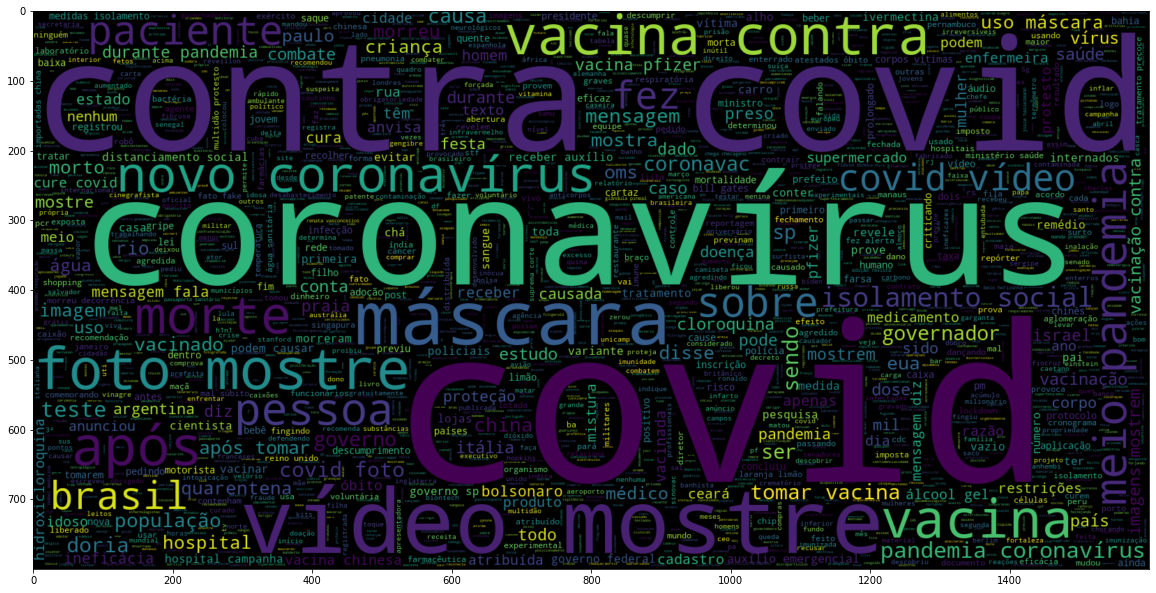

In [152]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df['title']))
plt.imshow(wc, interpolation='bilinear')

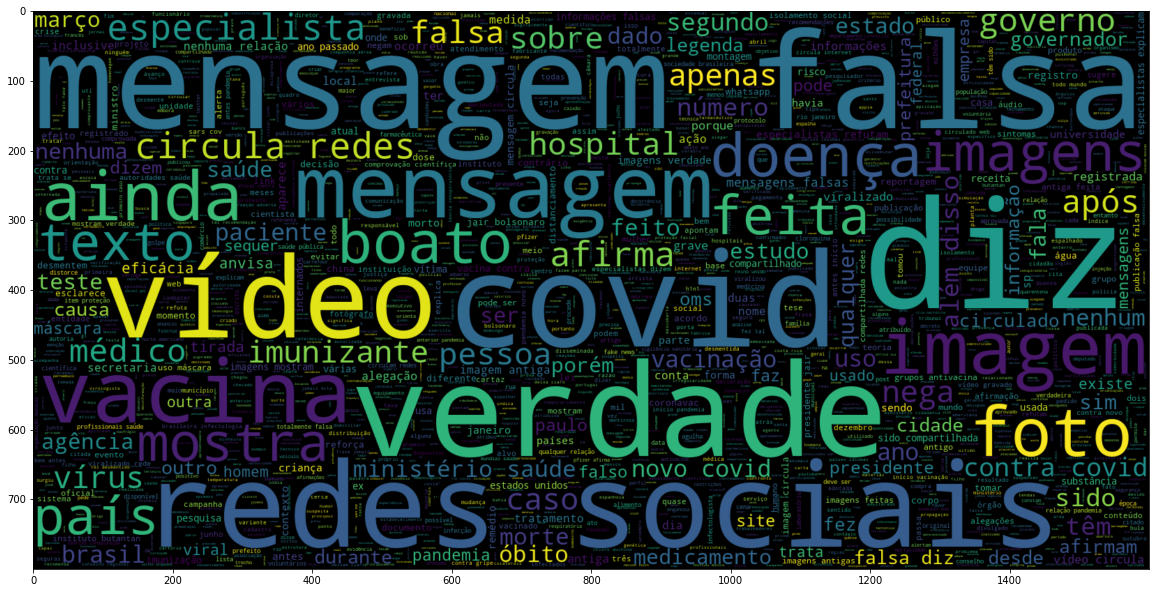

In [175]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df['description']))
plt.imshow(wc, interpolation='bilinear')